In [2]:
import os
import skimage.io as io
import skimage.transform as trans
import random
import h5py
import re
import matplotlib
import rasterio
import numpy as np
from rasterio.plot import show, show_hist
from rasterio.merge import merge as rastermerge
from matplotlib import pyplot
%matplotlib inline
from keras import metrics
from keras import backend as K
from keras.initializers import *
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from importlib import reload
from keras.callbacks import EarlyStopping, TensorBoard
from keras.models import load_model
from keras.models import save_model

model = load_model('/Users/ciaran/dev/dsa_project/models/1e-5_subset_2/model')

In [76]:
imageToPredict = rasterio.open('/Users/ciaran/data/imagery/tifs/blue_anchor/test_pred/blue_anchor_8005.tif')\
                         .read()
imageToPredict = np.moveaxis(imageToPredict, 0, -1)
imageToPredict = np.array([imageToPredict])

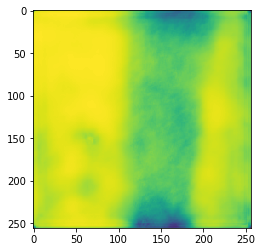

In [118]:
prediction = model.predict(imageToPredict)[0]
show(prediction)

In [120]:
metadata = rasterio.open('/Users/ciaran/data/imagery/tifs/blue_anchor/test_pred/blue_anchor_8005.tif')\
                   .meta
metadata['count'] = 1
metadata['dtype'] = 'float32'

In [121]:
prediction = np.moveaxis(prediction, -1, 0)

In [122]:
with rasterio.open(os.path.join('.', "file"), "w", **metadata) as dest:
                    dest.write(prediction)